<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Sep1-2/Tarea1Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt



$$
\text{compute_cost}(x, y, w) = \frac{1}{2m} \sum_{i=1}^{m} \left(f_w(x_i) - y_i\right)^2
$$

Donde:

- $$m$$ es el número de puntos de datos en el conjunto.
- $$x_i$$ es el valor de entrada en el punto de datos \(i\).
- $$y_i$$ es el valor real correspondiente al punto de datos \(i\).
- $$f_w(x_i)$$ es la predicción del modelo para el punto de datos \(i\), que está dado por $$w_0 \cdot x_i + w_1$$.

Esta ecuación representa la fórmula del costo que se utiliza en la regresión lineal para evaluar cuán bien se ajustan las predicciones del modelo a los valores reales. El objetivo es minimizar este costo ajustando los coeficientes \(w\) adecuadamente.

In [ ]:
# Define las funciones corregidas
def compute_cost(x, y, w):
    f_wx = w[0] * x + w[1]
    cost = np.sum((f_wx - y)**2)
    cost /= (2 * len(x))
    return cost

## Función `compute_gradient`

La función `compute_gradient` calcula el gradiente del costo con respecto a los coeficientes `w` en el contexto de un modelo de regresión lineal. Los gradientes se calculan de la siguiente manera:

$$
\frac{\partial}{\partial w_0} \text{compute_cost}(x, y, w) = \frac{1}{m} \sum_{i=1}^{m} \left(f_w(x_i) - y_i\right) x_i
$$

$$
\frac{\partial}{\partial w_1} \text{compute_cost}(x, y, w) = \frac{1}{m} \sum_{i=1}^{m} \left(f_w(x_i) - y_i\right)
$$

Donde:

- `w_0` y `w_1` son los coeficientes que se están ajustando.
- `x` es la matriz de características de entrada.
- `y` es el vector de valores objetivo.
- `f_w(x_i)` es la predicción del modelo para la muestra `x_i`


In [ ]:
def compute_gradient(x, y, w):
    dw = np.zeros(len(w))
    fw = w[0] * x + w[1]
    dw[0] = np.sum((fw - y) * x) / len(x)
    dw[1] = np.sum(fw - y) / len(x)
    return dw

## Función `gradient_descent`

La función `gradient_descent` realiza el proceso de descenso de gradiente para ajustar los coeficientes \(w\) de un modelo de regresión lineal. Esta función toma los siguientes argumentos:

- `x`: La matriz de características de entrada.
- `y`: El vector de valores objetivo.
- `w`: El vector de coeficientes inicial.
- `alpha`: La tasa de aprendizaje (tamaño de paso) para el descenso de gradiente.
- `num_iters`: El número de iteraciones a realizar.
- `cost_function`: La función que calcula el costo del modelo.
- `compute_gradient`: La función que calcula el gradiente del costo con respecto a \(w\).

La función devuelve los coeficientes finales \(w\) y una lista de costos en cada iteración.


In [ ]:
def gradient_descent(x, y, w, alpha, num_iters, cost_function, compute_gradient):
    costs = []  # Lista para almacenar el costo en cada iteración
    for i in range(num_iters):
        dj_dw = compute_gradient(x, y, w)
        w = w - alpha * dj_dw
        cost = cost_function(x, y, w)
        costs.append(cost)  # Agregar el costo a la lista
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteración {i:4}: Costo {cost:0.5e}, w[0]: {w[0]:0.5e}, w[1]: {w[1]:0.5e}")
    return w, costs  # Devuelve los coeficientes finales y la lista de costos

In [45]:
data = np.loadtxt("olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]
x = (x - 1896) / 4

# Parámetros iniciales
w0, w1 = 0.0, 0.0
iterations = 100000
alpha = 2.8e-4

# Ejecutar el descenso de gradiente y obtener los costos
w_final, costs = gradient_descent(x, y, [w0, w1], alpha, iterations, compute_cost, compute_gradient)

# Imprimir los coeficientes finales
print(f"Coeficientes finales: w[0] = {w_final[0]}, w[1] = {w_final[1]}")

Iteración    0: Costo 4.86238e+01, w[0]: 3.98531e-02, w[1]: 2.90910e-03
Iteración 10000: Costo 3.65670e+00, w[0]: 2.08540e-01, w[1]: 6.03270e+00
Iteración 20000: Costo 7.92409e-01, w[0]: 6.70410e-02, w[1]: 8.79304e+00
Iteración 30000: Costo 1.87255e-01, w[0]: 2.00157e-03, w[1]: 1.00618e+01
Iteración 40000: Costo 5.94016e-02, w[0]: -2.78935e-02, w[1]: 1.06450e+01
Iteración 50000: Costo 3.23893e-02, w[0]: -4.16347e-02, w[1]: 1.09131e+01
Iteración 60000: Costo 2.66823e-02, w[0]: -4.79508e-02, w[1]: 1.10363e+01
Iteración 70000: Costo 2.54765e-02, w[0]: -5.08540e-02, w[1]: 1.10929e+01
Iteración 80000: Costo 2.52218e-02, w[0]: -5.21884e-02, w[1]: 1.11190e+01
Iteración 90000: Costo 2.51680e-02, w[0]: -5.28018e-02, w[1]: 1.11309e+01
Coeficientes finales: w[0] = -0.053083701767846526, w[1] = 11.136417799443628


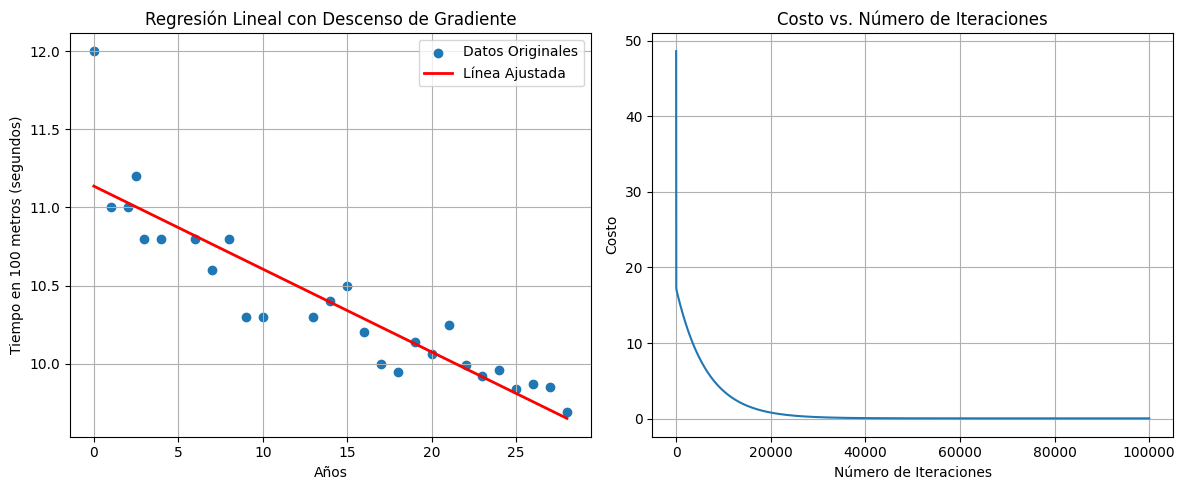

In [46]:
# Graficar los datos y la línea ajustada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Datos Originales')
plt.plot(x, w_final[0] * x + w_final[1], color='red', linewidth=2, label='Línea Ajustada')
plt.xlabel('Años')
plt.ylabel('Tiempo en 100 metros (segundos)')
plt.legend()
plt.title('Regresión Lineal con Descenso de Gradiente')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(iterations), costs, label='Costo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Costo vs. Número de Iteraciones')
plt.grid(True)

plt.tight_layout()
plt.show()

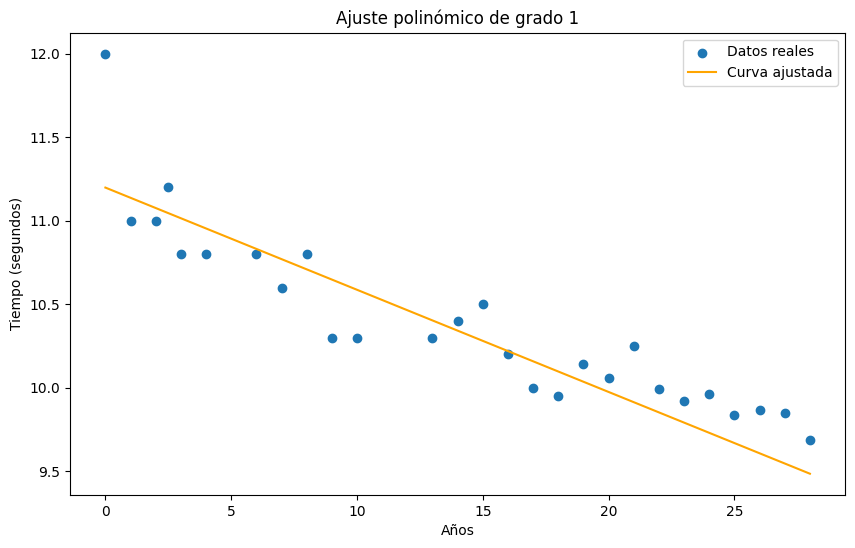

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def regresion_polinomica(x, y, grado):
    # Crear matriz de diseño
    X = np.vander(x, grado + 1, increasing=True)
    t = y
    XX = np.dot(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X.T, t)
    w = np.dot(invXX, Xt)

    # Calcular los valores predichos usando los pesos w
    y_pred = np.dot(X, w)

    # Calcular el error cuadrático medio
    mse = np.mean((y_pred - y)**2)

    return w, mse

# Cargar los datos
data = np.loadtxt("olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]
x = (x - 1896) / 4

grado_maximo = 8

for grado in range(1, 2):
    w_test, costo = regresion_polinomica(x[:20], y[:20], grado)
    curva_ajustada = np.zeros_like(x)

    for i in range(len(w_test)):
        curva_ajustada += w_test[i] * x**i

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Datos reales')
    plt.plot(x, curva_ajustada, label='Curva ajustada', color='orange')
    plt.xlabel('Años')
    plt.ylabel('Tiempo (segundos)')
    plt.legend()
    plt.title(f'Ajuste polinómico de grado {grado}')
    plt.show()